# Domain Analysis

## Attribute information:

● **Age of the patient** 

 ● **Gender of the patient**


● **Total Bilirubin**  - normal range should be in between 1.71 to 20.5 µmol/L  as per the article (https://www.mountsinai.org/health-library/tests/bilirubin-blood-test)


● **Direct Bilirubin** - direct bilirubin range should be less than 5.1 µmol/L for a normal person as per (https://www.mountsinai.org/health-library/tests/bilirubin-blood-test)

● **Alkaline Phosphotase**--The normal range is 44 to 147 international units per liter (IU/L) or 0.73 to 2.45 microkatal per liter (µkat/L). as per (https://www.mountsinai.org/health-library/tests/alp-blood-test)


● **Alamine Aminotransferase**- the normal range is 4 to 36 U/L.(https://www.mountsinai.org/health-library/tests/alanine-transaminase-alt-blood-test)

● **Aspartate Aminotransferase** -- The normal range is 8 to 33 U/L.(https://www.mountsinai.org/health-library/tests/aspartate-aminotransferase-ast-blood-test)

●**Total_ProtiensThe normal**-- range is 6.0 to 8.3 grams per deciliter (g/dL) or 60 to 83 g/L(https://www.mountsinai.org/health-library/tests/total-protein)

● **Albumin** - A normal albumin range is 3.4 to 5.4 g/dL. (https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=167&contentid=albumin_blood)

● **Albumin and Globulin Ratio** -The normal range for albumin/globulin ratio is over 1Trusted Source, usually around 1 to 2. That’s because there’s a bit more albumin than globulin in serum protein.(https://www.healthline.com/health/a-g-ratio-high#results)

● **Target**: field used to split the data into two sets (1 : patient with liver disease and 2: patient
with no liver disease disease)

## Importing the basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,RocCurveDisplay,auc,roc_auc_score


from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('whitegrid')

In [3]:
sns.set_palette('RdYlBu_r')

In [4]:
# !wget https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1007-LiverPatientPred.zip

In [5]:
# import zipfile
# zip_ref=zipfile.ZipFile('/content/PRCP-1007-LiverPatientPred.zip') #colab path
# zip_ref.extractall()
# zip_ref.close()

In [6]:
headings=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Target']
data=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",names=headings)

## Basic checks

In [7]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [9]:
data.shape

(583, 11)

In [10]:
data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Target                          int64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


# Numerical summary 

In [12]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# categorical summary

In [13]:
data.describe(include='O')

,Gender
count,583
unique,2
top,Male
freq,441


# Null value count

In [14]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

# Target classes and count

In [15]:
data.Target.unique()

array([1, 2], dtype=int64)

In [16]:
data.Target.value_counts()

1    416
2    167
Name: Target, dtype: int64

## Removing the duplicates

In [17]:
duplicates=data[data.duplicated()]
len(duplicates)

13

In [18]:
print('No of duplicate values:', duplicates.shape[0], '\nsize of data:', data.shape)

No of duplicate values: 13 
size of data: (583, 11)


In [19]:
data=data.drop_duplicates()
data.shape

(570, 11)

## Categorical and numerical columns segregation

In [20]:
cat_cols=[] # empty list for categorical columns
num_cols=[] # empty list for numerical columns

for i in data.columns:
    if data[i].dtype=='object': # condition to check whether it is object or any other datatype
        cat_cols.append(i)
    else:
        num_cols.append(i)
print('catgorical columns are:- \n', cat_cols, end=' ')
print('\n')
print('numerical columns are:- \n', num_cols, end=' ')

catgorical columns are:- 
 ['Gender'] 

numerical columns are:- 
 ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target'] 

In [21]:
num_data=data[num_cols] # defined numerical dataframe using numerical columns
cat_data=data[cat_cols] # defined categorical dataframe using catgorical columns

In [22]:
num_data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [23]:
cat_data.head()

,Gender
0,Female
1,Male
2,Male
3,Male
4,Male


In [24]:
data.Gender.unique() 

array(['Female', 'Male'], dtype=object)

In [25]:
data.Gender.value_counts()

Male      430
Female    140
Name: Gender, dtype: int64

## Exploratory data analysis

### Univariate analysis for numerical data

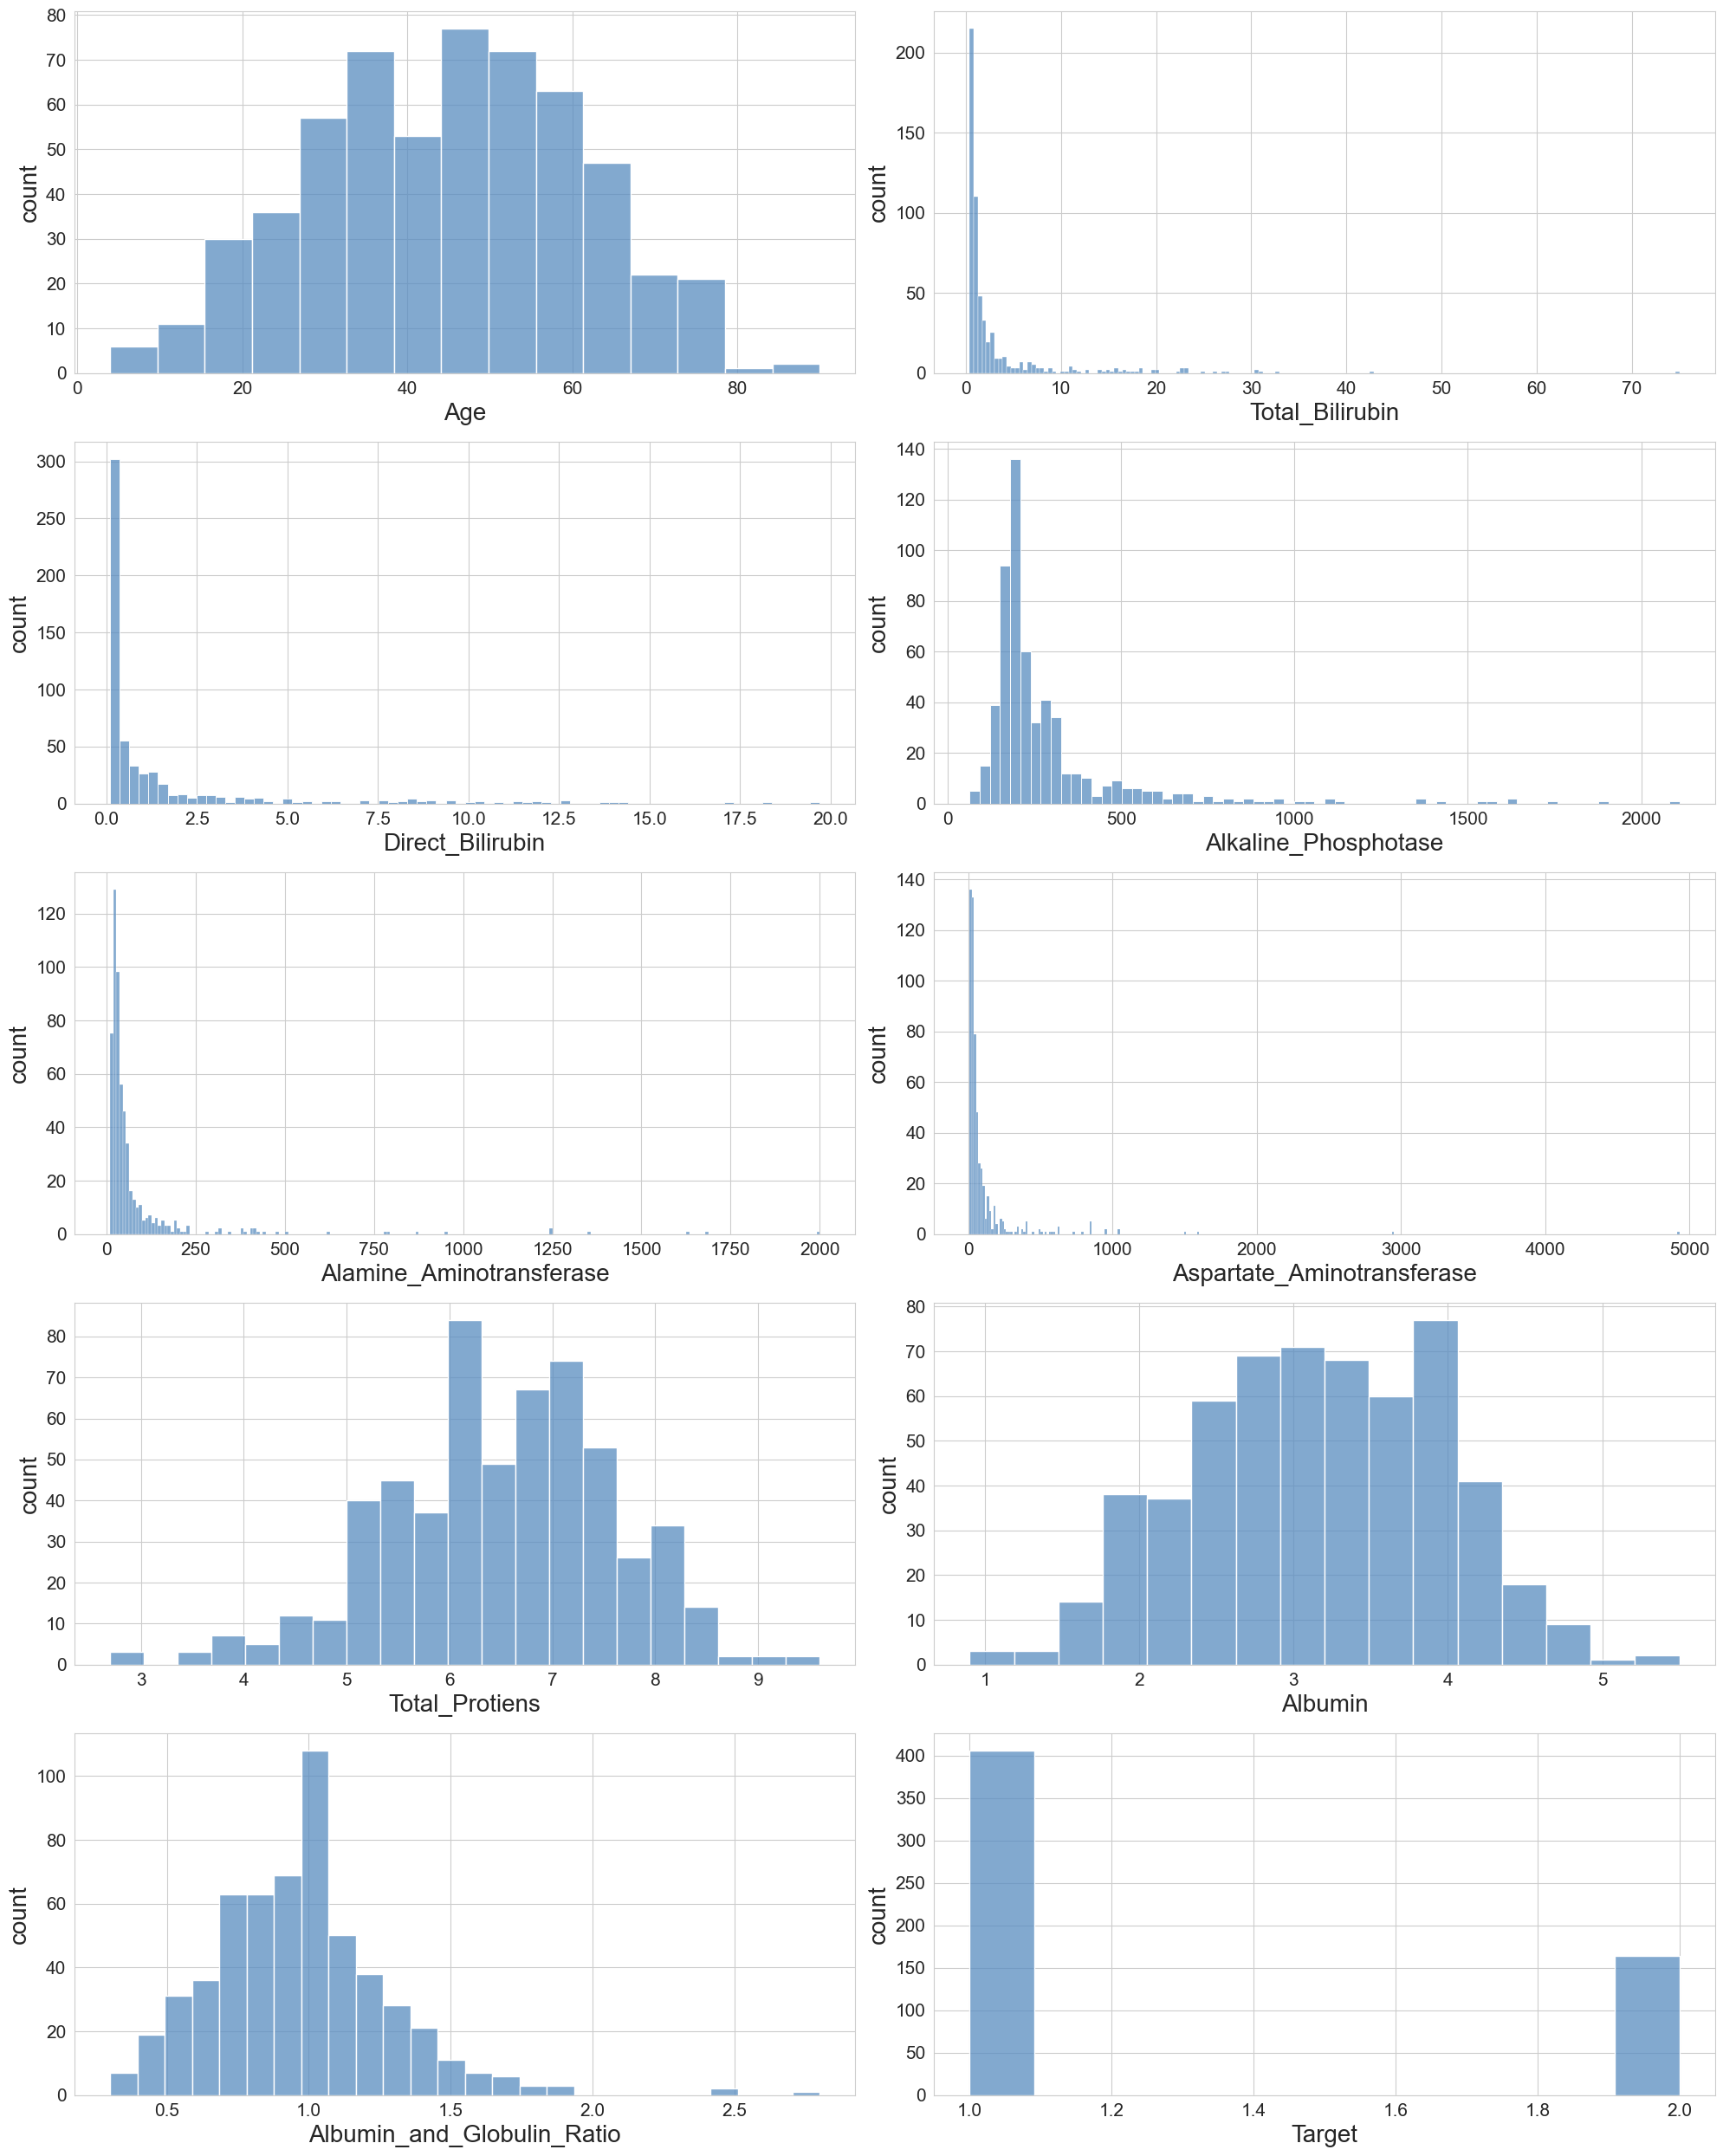

In [26]:
# plt.figure(figsize=(20,25),facecolor='white')
# plotnumber=1

# for i in num_data:
   
#     plt.subplot(5,2,plotnumber) 
#     sns.histplot(x=i, data=data)
#     plt.xlabel(i,fontsize=20)
#     plt.ylabel('count',fontsize=20)
#     plt.xticks(fontsize=15)
#     plt.yticks(fontsize=15)
#     plotnumber+=1
    
# plt.tight_layout()

●`data['Age']` -- the age column is normally distributed so the maximum data is taken for the age between 30-60


●`data['Total_Bilirubin]`,`data['Direct_Bilirubin']`,`data['Alkaline_Phosphotase']`,
`data['Alamine_Aminotransferase']``data['Aspartate_Aminotransferase']`- most of the values are in the range of normal person health condtion few entries are having values over the range of healthy person


●`data['Total_Protiens']`--- most of the people having protein count between 5-8 which is normal

●`data['Albumin']` & `data['AAlbumin_and_Globulin_Ratio']` also having most entries in the normal range 

### Univariate analysis for categorical data

In [27]:
# plt.figure(figsize=(5,5), facecolor='white')
# sns.countplot(x='Gender', hue='Target', data=data)
# plt.show()

●   most of the liver daigonisis patients are male and male are prone to liver disease

In [28]:
#import sweetviz as sv # univariate
#my_report=sv.analyze(data)
#my_report.show_html()

### Bivariate analysis

In [29]:
# plt.figure(figsize=(5,5))
# sns.jointplot(x='Total_Bilirubin',y='Direct_Bilirubin',hue='Target',palette='RdYlBu_r',data=data)
# plt.show()

In [30]:
# plt.figure(figsize=(5,5),facecolor='white')
# sns.jointplot(x='Total_Bilirubin',y='Albumin',palette='RdYlBu_r',hue='Target',data=data)
# plt.show()

In [31]:
# plt.figure(figsize=(5,5),facecolor='white')
# sns.jointplot(x='Total_Protiens',y='Albumin_and_Globulin_Ratio',palette='RdYlBu_r',hue='Target',data=data)
# plt.show()

●  we can clearly see that there is no direct relation between the independant features

### Multivariate analysis

In [32]:
# sns.pairplot(data,hue='Target',palette='RdYlBu_r')



*   with the increment of `albumin`  the `albumin_glucose_ratio` is increasing 
*   and also with it has direct corelation with total protien of the body
*   the `total bilirubin` and `direct bilirubin` is directly corelated




## Data preprocessing

In [33]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

## Handling missing values

In [34]:
data.dropna(inplace=True)

In [35]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

In [36]:
data.shape

(566, 11)

## Converting categorical data in to numerical data

## One hot encoder

In [37]:
data.Gender.value_counts()

Male      428
Female    138
Name: Gender, dtype: int64

In [38]:
data['Gender']=pd.get_dummies(data['Gender'],drop_first=True)

In [39]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [40]:
data.Gender.value_counts()

1    428
0    138
Name: Gender, dtype: int64

## Check for outliers

In [41]:
num_data.columns[:-1]

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'],
      dtype='object')

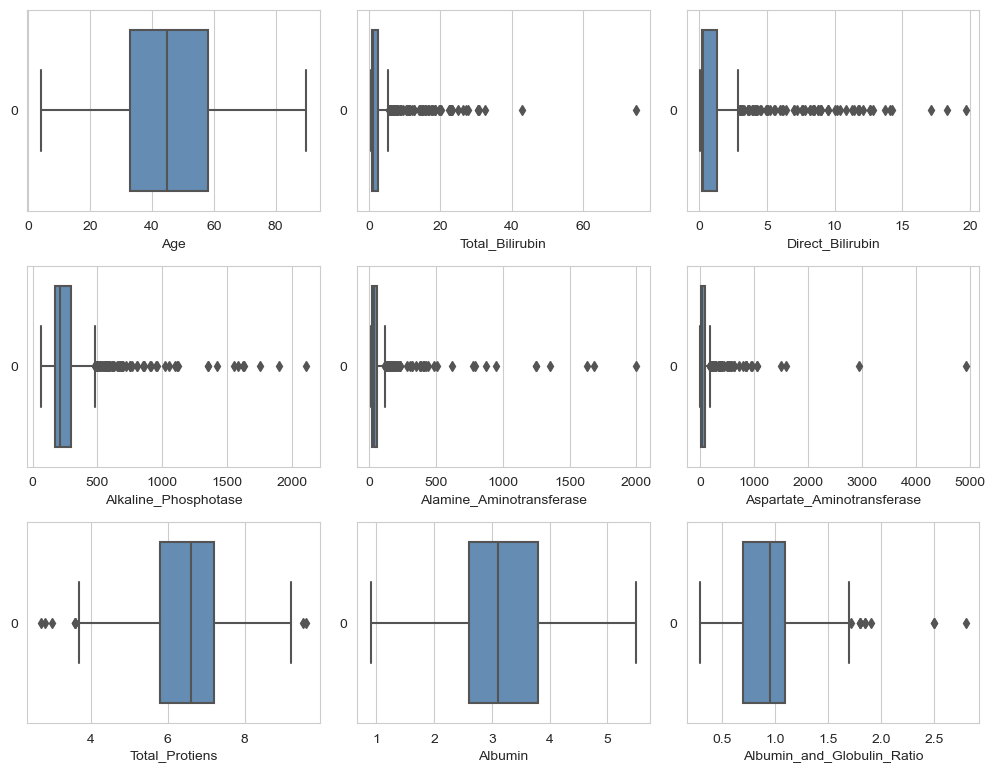

In [42]:
# plt.figure(figsize=(10,10),facecolor='white')
# plotnumber=1

# for column in num_data.columns[:-1]:
   
#     plt.subplot(4,3,plotnumber)
#     sns.boxplot(data[column],orient='h')
# #     data[column].iplot(kind='box')
#     plt.xlabel(column,fontsize=10)
#     plt.xticks(fontsize=10)
#     plotnumber+=1
    
# plt.tight_layout()



*   as you can in the columns mentioned in the `cols` list are having most of the data outside the box plot , so applying the log transformation to avaoid data loss



In [43]:
cols=['Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase']

In [44]:
data.shape

(566, 11)

#log transformation

In [45]:
for i in cols:
    data[i]=np.log(data[i])

In [46]:
# plt.figure(figsize=(10,10),facecolor='white')
# plotnumber=1

# for column in num_data.columns[:-1]:
   
#     plt.subplot(4,3,plotnumber)
#     sns.boxplot(data[column],orient='h')
# #     data[column].iplot(kind='box')
#     plt.xlabel(column,fontsize=10)
#     plt.xticks(fontsize=10)
#     plotnumber+=1
    
# plt.tight_layout()



*   After applying log transformation the values came to better range but still have some values out of the box so going to impute those values with median of that column




#median imputation

In [47]:
len(data.loc[data['Total_Bilirubin']>2.9])

24

In [48]:
data.loc[data['Total_Bilirubin']>2.9,'Total_Bilirubin']=np.median(data['Total_Bilirubin'])

In [49]:
len(data.loc[data['Alkaline_Phosphotase']>6.5])

34

In [50]:
data.loc[data['Alkaline_Phosphotase']>6.5,'Alkaline_Phosphotase']=np.median(data['Alkaline_Phosphotase'])

In [51]:
len(data.loc[data['Alamine_Aminotransferase']>5.5])

27

In [52]:
data.loc[data['Alamine_Aminotransferase']>5.5,'Alamine_Aminotransferase']=np.median(data['Alamine_Aminotransferase'])

In [53]:
len(data.loc[data['Aspartate_Aminotransferase']>6.5])

15

In [54]:
data.loc[data['Aspartate_Aminotransferase']>6.5,'Aspartate_Aminotransferase']=np.median(data['Aspartate_Aminotransferase'])

In [55]:
len(data.loc[data['Albumin_and_Globulin_Ratio']>1.7])

10

In [56]:
data.loc[data['Albumin_and_Globulin_Ratio']>1.7,'Albumin_and_Globulin_Ratio']=np.median(data['Albumin_and_Globulin_Ratio'])

In [57]:
# plt.figure(figsize=(10,10),facecolor='white')
# plotnumber=1

# for column in num_data.columns[:-1]:
   
#     plt.subplot(4,3,plotnumber)
#     sns.boxplot(data[column],orient='h')
# #     data[column].iplot(kind='box')
#     plt.xlabel(column,fontsize=10)
#     plt.xticks(fontsize=10)
#     plotnumber+=1
    
# plt.tight_layout()

In [58]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,-0.356675,-2.302585,5.231109,2.772589,2.890372,6.8,3.3,0.90,1
1,62,1,2.388763,1.704748,5.337538,4.158883,4.605170,7.5,3.2,0.74,1
2,62,1,1.987874,1.410987,6.194405,4.094345,4.219508,7.0,3.3,0.89,1
3,58,1,0.000000,-0.916291,5.204007,2.639057,2.995732,6.8,3.4,1.00,1
4,72,1,1.360977,0.693147,5.273000,3.295837,4.077537,7.3,2.4,0.40,1


# feature selection

In [59]:
# plt.figure(figsize=(10, 10), facecolor='white')
# sns.heatmap(data.iloc[:,:-1].corr(), annot=True,cmap='Blues')



*   No corelation value going beyond 0.9 so keeping all the columns



In [60]:
data.iloc[:,:-1].corrwith(data['Target']).sort_values()

Direct_Bilirubin             -0.325756
Total_Bilirubin              -0.287960
Aspartate_Aminotransferase   -0.287600
Alamine_Aminotransferase     -0.257252
Alkaline_Phosphotase         -0.184558
Age                          -0.133821
Gender                       -0.077396
Total_Protiens                0.036443
Albumin                       0.165273
Albumin_and_Globulin_Ratio    0.190167
dtype: float64

In [61]:
data['Target']=data['Target'].map({2:0,1:1})

In [62]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,-0.356675,-2.302585,5.231109,2.772589,2.890372,6.8,3.3,0.90,1
1,62,1,2.388763,1.704748,5.337538,4.158883,4.605170,7.5,3.2,0.74,1
2,62,1,1.987874,1.410987,6.194405,4.094345,4.219508,7.0,3.3,0.89,1
3,58,1,0.000000,-0.916291,5.204007,2.639057,2.995732,6.8,3.4,1.00,1
4,72,1,1.360977,0.693147,5.273000,3.295837,4.077537,7.3,2.4,0.40,1


In [63]:
X=data.iloc[:,:-1]
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,-0.356675,-2.302585,5.231109,2.772589,2.890372,6.8,3.3,0.90
1,62,1,2.388763,1.704748,5.337538,4.158883,4.605170,7.5,3.2,0.74
2,62,1,1.987874,1.410987,6.194405,4.094345,4.219508,7.0,3.3,0.89
3,58,1,0.000000,-0.916291,5.204007,2.639057,2.995732,6.8,3.4,1.00
4,72,1,1.360977,0.693147,5.273000,3.295837,4.077537,7.3,2.4,0.40


In [64]:
y=data.Target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

In [65]:
y.value_counts()

1    404
0    162
Name: Target, dtype: int64

# balncing of data

In [66]:
# Apply smote
from imblearn.over_sampling import SMOTE,SVMSMOTE,ADASYN
smote=SMOTE()

In [67]:
X_smote, y_smote=smote.fit_resample(X, y)

In [68]:
from collections import Counter
print("actual classes",Counter(y))
print("smote classes",Counter(y_smote))

actual classes Counter({1: 404, 0: 162})
smote classes Counter({1: 404, 0: 404})


# train_test_split

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(646, 10)
(162, 10)
(646,)
(162,)


## Scaling of data

In [71]:
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
scaler=MinMaxScaler()

In [72]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [73]:
y_smote.value_counts()

1    404
0    404
Name: Target, dtype: int64

In [74]:
len(X_train_scaled),len(y_train)

(646, 646)

# Required functions for ROC MODEL

In [75]:
        
class Roc_Model:
    
    def __init__(self,model):
        
        self.model=model
        
        
    def fit(self,x,y):
        
        self.model.fit(x,y)
    
    def predict_proba(self,x_test):
    
        self.__log_proba=self.model.predict_proba(X_test)
           
        self.__fpr,self.__tpr,self.__threshold=roc_curve(y_test,self.__log_proba[:,-1])
        
        return self.__log_proba
    
    def best_threshold(self):
 
        gmeans=np.sqrt(self.__tpr*(1-self.__fpr))
    
        ix = np.argmax(gmeans)
        
        print('Best Threshold=%f, G-Mean=%.3f' % (self.__threshold[ix], gmeans[ix]))
        
        
    def class_segregation(self):
        
        res=[]
        threshold=float(input('enter the best thrshold value: '))
        for i in self.__log_proba:
            if i[1]>threshold:
            
                res.append(1)
            else:
                res.append(0)
                
        return res
         
    def roc_plot(self):
        
        auc_score=auc(self.__fpr,self.__tpr)
        RocCurveDisplay(fpr=self.__fpr,tpr=self.__tpr,roc_auc=auc_score).plot()

### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [77]:
obj=Roc_Model(log_model)

In [78]:
obj.fit(X_train,y_train)

In [79]:
pred=obj.predict_proba(X_test)

In [80]:
pred

array([[0.78512407, 0.21487593],
       [0.82092331, 0.17907669],
       [0.71451802, 0.28548198],
       [0.20492449, 0.79507551],
       [0.31074476, 0.68925524],
       [0.65936292, 0.34063708],
       [0.19624472, 0.80375528],
       [0.64392896, 0.35607104],
       [0.69257829, 0.30742171],
       [0.66418837, 0.33581163],
       [0.62959611, 0.37040389],
       [0.12878558, 0.87121442],
       [0.11223358, 0.88776642],
       [0.77876694, 0.22123306],
       [0.48832526, 0.51167474],
       [0.07428452, 0.92571548],
       [0.34685433, 0.65314567],
       [0.28688873, 0.71311127],
       [0.62075727, 0.37924273],
       [0.03652612, 0.96347388],
       [0.77093625, 0.22906375],
       [0.6182886 , 0.3817114 ],
       [0.79749634, 0.20250366],
       [0.82411996, 0.17588004],
       [0.08090391, 0.91909609],
       [0.65446646, 0.34553354],
       [0.64160709, 0.35839291],
       [0.54704859, 0.45295141],
       [0.75374937, 0.24625063],
       [0.10703721, 0.89296279],
       [0.

In [81]:
thr=obj.best_threshold()

Best Threshold=0.531277, G-Mean=0.719


In [82]:
pred=obj.class_segregation()

enter the best thrshold value: 0.531277


In [83]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[69 17]
 [27 49]]
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        86
           1       0.74      0.64      0.69        76

    accuracy                           0.73       162
   macro avg       0.73      0.72      0.72       162
weighted avg       0.73      0.73      0.73       162



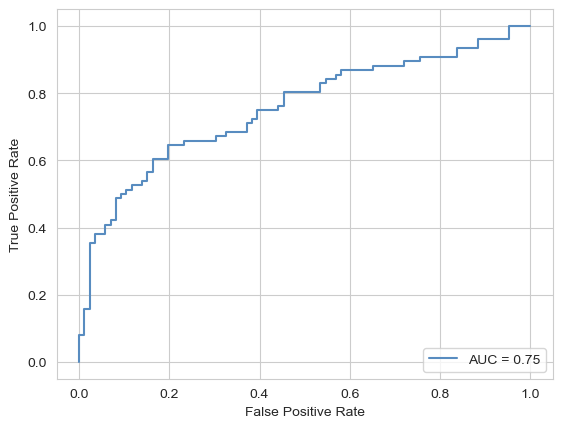

In [84]:
plot=obj.roc_plot()

### KNN Classifier

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()


In [86]:
obj2=Roc_Model(knn_model)

In [87]:
obj2.fit(X_train,y_train)

In [146]:
pred=obj2.predict_proba(X_test)

In [147]:
pred

array([[0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0. , 1. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6,

In [148]:
thrs2=obj2.best_threshold()

Best Threshold=0.600000, G-Mean=0.779


In [149]:
obj2.results()

enter the best thrshold value: 0.60
metrics on test data 

confusion matrix: 
 [[82  4]
 [34 42]]
classification report: 
               precision    recall  f1-score   support

           0       0.71      0.95      0.81        86
           1       0.91      0.55      0.69        76

    accuracy                           0.77       162
   macro avg       0.81      0.75      0.75       162
weighted avg       0.80      0.77      0.75       162



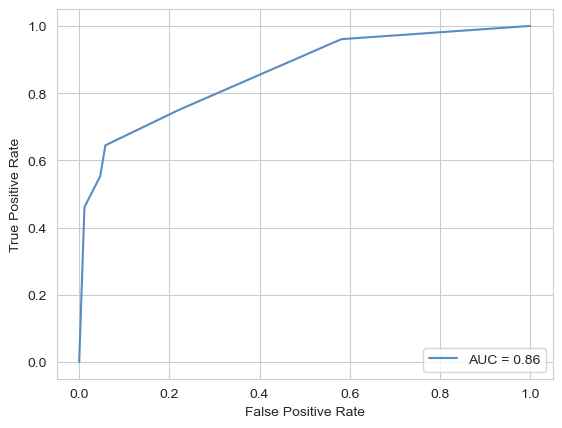

In [150]:
obj2.roc_plot()

# Random forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rf_model=RandomForestClassifier()

In [91]:
obj3=Roc_Model(rf_model)

In [92]:
obj3.best_threshold()

Best Threshold=0.490000, G-Mean=0.798


In [93]:
obj3.predict()

enter the best thrshold value: 0.49
metrics on test data 

confusion matrix: 
 [[67 19]
 [15 61]]
classification report: 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        86
           1       0.76      0.80      0.78        76

    accuracy                           0.79       162
   macro avg       0.79      0.79      0.79       162
weighted avg       0.79      0.79      0.79       162



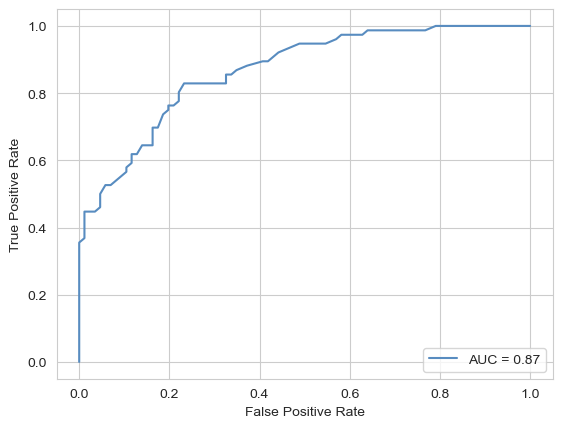

In [94]:
obj3.roc_plot()

# Gradient boosting

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

In [96]:
gb_model=GradientBoostingClassifier()

In [97]:
obj4=Roc_Model(gb_model)

In [98]:
obj4.best_threshold()

Best Threshold=0.633244, G-Mean=0.769


In [99]:
obj4.predict()

enter the best thrshold value: 0.633244
metrics on test data 

confusion matrix: 
 [[73 13]
 [23 53]]
classification report: 
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        86
           1       0.80      0.70      0.75        76

    accuracy                           0.78       162
   macro avg       0.78      0.77      0.77       162
weighted avg       0.78      0.78      0.78       162



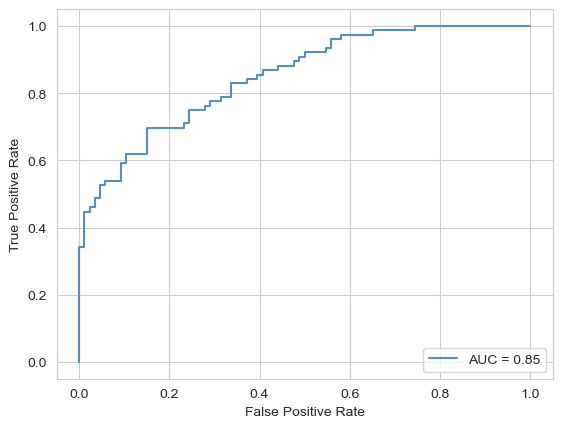

In [100]:
obj4.roc_plot()

# XGB CLASSIFIER

In [101]:
from xgboost import XGBClassifier

In [102]:
xgb_model=XGBClassifier()

In [103]:
obj5=Roc_Model(xgb_model)

In [104]:
obj5.best_threshold()

Best Threshold=0.709612, G-Mean=0.815


In [105]:
obj5.predict()

enter the best thrshold value: 0.709612
metrics on test data 

confusion matrix: 
 [[70 16]
 [15 61]]
classification report: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.82        86
           1       0.79      0.80      0.80        76

    accuracy                           0.81       162
   macro avg       0.81      0.81      0.81       162
weighted avg       0.81      0.81      0.81       162



# Bagging clasifier

In [106]:
from sklearn.svm import SVC

In [107]:
sv_model=SVC()

In [108]:
from sklearn.ensemble import BaggingClassifier

In [109]:
bag_model=BaggingClassifier(estimator=sv_model)

In [110]:
obj6=Roc_Model(bag_model)

In [111]:
obj6.best_threshold()

Best Threshold=0.400000, G-Mean=0.712


In [112]:
obj6.predict()

enter the best thrshold value: 0.4
metrics on test data 

confusion matrix: 
 [[72 14]
 [33 43]]
classification report: 
               precision    recall  f1-score   support

           0       0.69      0.84      0.75        86
           1       0.75      0.57      0.65        76

    accuracy                           0.71       162
   macro avg       0.72      0.70      0.70       162
weighted avg       0.72      0.71      0.70       162



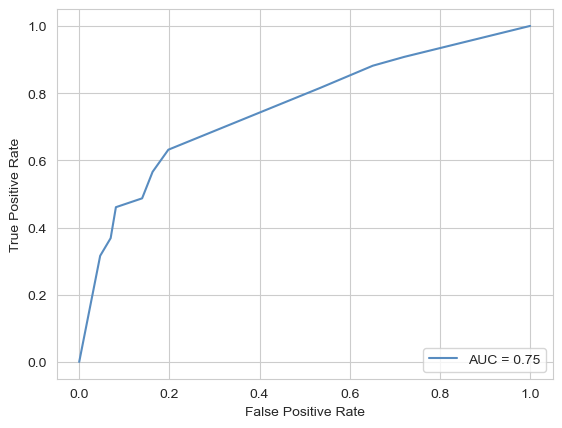

In [114]:
obj6.roc_plot()